# <font color="blue">Project 2: DoppelGanger Find your Celebrity Look-Alike </font>
We have seen how face Recognition algorithms work. In short, they convert a face into a high dimensional vector and then learn a feature space in that high dimension. Once the algorithm learns a robust feature space, you can add more people to the same space and they will form a different cluster.

### <font color="green">Your Task</font>
In this project, we will build a Fun Application - We will use the Face Embeddings to **find a doppelganger or look-alike to a given person.** Specifically, we will give you images of two persons and a celebrity dataset. Your task will be to find their celebrity look-alike. The first person is **Sofia Solares** who looks like the American Singer **Selena Gomez** and the second one is **Shashikant Pedwal** who looks like Indian Film Actor **Amitabh Bachchan**.

Given below is the Expected Output. 

### <font color="green">Expected Output</font>

![](https://www.learnopencv.com/wp-content/uploads/2020/05/doppelganger-output-selena.jpg)

![](https://www.learnopencv.com/wp-content/uploads/2020/05/doppelganger-output-amitabh.jpg)


By now, you should be able to discern what the problem is, and how you are going to solve it. You simply need a dataset which has enough celebrity faces and use face embeddings to match the test image with the celebrity face embeddings. That's enough Hint!

## <font color="blue">The Dataset</font>
There are many datasets which contain images of celebrities. Some of them are:
* [CelebA Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)
* [VGGFace](https://www.robots.ox.ac.uk/~vgg/data/vgg_face/)
* [VGGFace2](http://www.robots.ox.ac.uk/~vgg/data/vgg_face2/)
* [MS-Celeb-1M](https://www.microsoft.com/en-us/research/project/ms-celeb-1m-challenge-recognizing-one-million-celebrities-real-world/)
* [Celebrity-Together Dataset](https://www.robots.ox.ac.uk/~vgg/data/celebrity_together/)

### <font color="green">celeb_mini Dataset</font>
Since most of the datasets are huge in size, we have curated a small dataset for this experiment.

We will use a subset of the Query set of the Celebrity Together Dataset in this project. The query dataset has around 1100 celebs and is ~400MB in size. 

The subset we have created is using 5 images per celebrity and it has been saved in the **`../resource/asnlib/publicdata/celeb_mini`** folder. It is ~70MB in size. We have also provided a **`celeb_mapping.npy`** file which has the mapping of the code name to the actual name of the celebrity.

The **`celeb_mini`** folder has the following structure:

```
celeb_mini
└───n00000001
│   └──n00000001_00000263.JPEG
│   └──n00000001_00000405.JPEG
│      ...
└───n00000003
│   └──n00000003_00000386.JPEG
│   └──n00000003_00000488.JPEG
│       ...
│
```
    
**`celeb_mapping.npy`** contains a dictionary which contains the mapping between the folder names and the celebrity's actual name as show below:
```
{'n00000001': 'A.J. Buckley',
 'n00000002': 'A.R. Rahman',
 'n00000003': 'Aamir Khan',
 'n00000004': 'Aaron Staton',
 'n00000005': 'Aaron Tveit',
 'n00000006': 'Aaron Yoo',
 'n00000007': 'Abbie Cornish',
 .
 .
 .
}
```


## <font color="blue">Marks Distribution </font>
1. **Implementation - 70 Marks**
1. **Video/Text Explanation - 30 marks**

#### <font color="red">Note that you are free to use any other dataset if you have the resources of space and compute to handle the large datasets.</font>


In [1]:
import os,random,glob
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

## <font color="blue">Load the model for face landmarks and face recognition</font>

Initialize Dlib’s Face Detector, Facial Landmark Detector and Face Recognition neural network objects

#### <font color="red">You are free to use other face recognition models as well. </font>

In [3]:
# Path to landmarks and face recognition model files
PREDICTOR_PATH = '../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat'
FACE_RECOGNITION_MODEL_PATH = '../resource/lib/publicdata/models/dlib_face_recognition_resnet_model_v1.dat'

# Initialize face detector, facial landmarks detector 
# and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor(PREDICTOR_PATH)
faceRecognizer = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

## <font color="blue">Explore Data </font>
In this section, we provide sample code of how to load the images and use the label mapping for your reference. This should help you get started with handling images and finding the embeddings.

In [4]:
# Root folder of the dataset
faceDatasetFolder = '../resource/asnlib/publicdata/celeb_mini'
# Label -> Name Mapping file
labelMap = np.load("../resource/asnlib/publicdata/celeb_mapping.npy", allow_pickle=True).item()

In [5]:
for key, value in labelMap.items():
    print('labelMap["{}"] = "{}";'.format(key,value))

labelMap["n00000001"] = "A.J. Buckley";
labelMap["n00000002"] = "A.R. Rahman";
labelMap["n00000003"] = "Aamir Khan";
labelMap["n00000004"] = "Aaron Staton";
labelMap["n00000005"] = "Aaron Tveit";
labelMap["n00000006"] = "Aaron Yoo";
labelMap["n00000007"] = "Abbie Cornish";
labelMap["n00000008"] = "Abel Ferrara";
labelMap["n00000009"] = "A P J Abdul Kalam";
labelMap["n00000010"] = "Abigail Breslin";
labelMap["n00000011"] = "Abigail Klein";
labelMap["n00000012"] = "Abigail Spencer";
labelMap["n00000013"] = "Abraham Benrubi";
labelMap["n00000014"] = "Adam Baldwin";
labelMap["n00000015"] = "Adam Beach";
labelMap["n00000016"] = "Adam Brody";
labelMap["n00000017"] = "Adam Buxton";
labelMap["n00000018"] = "Adam Copeland";
labelMap["n00000019"] = "Adam Driver";
labelMap["n00000020"] = "Adam G. Sevani";
labelMap["n00000021"] = "Adam Garcia";
labelMap["n00000022"] = "Adam Godley";
labelMap["n00000023"] = "Adam Goldberg";
labelMap["n00000024"] = "Adam Gregory";
labelMap["n00000025"] = "Adam Hicks

labelMap["n00002268"] = "Sharon Tate";
labelMap["n00002269"] = "Shaun Cassidy";
labelMap["n00002270"] = "Shaun Sipos";
labelMap["n00002271"] = "Shaun Toub";
labelMap["n00002272"] = "Shawn Ashmore";
labelMap["n00002273"] = "Shawn Hatosy";
labelMap["n00002274"] = "Shawn Pyfrom";
labelMap["n00002275"] = "Shawn Roberts";
labelMap["n00002276"] = "Shawnee Smith";
labelMap["n00002277"] = "Shay Mitchell";
labelMap["n00002278"] = "Shelley Long";
labelMap["n00002279"] = "Shelley Winters";
labelMap["n00002280"] = "Shemar Moore";
labelMap["n00002281"] = "Sheree J. Wilson";
labelMap["n00002282"] = "Sheridan Smith";
labelMap["n00002283"] = "Sherilyn Fenn";
labelMap["n00002284"] = "Sherri Saum";
labelMap["n00002285"] = "Sherri Shepherd";
labelMap["n00002286"] = "Sherry Stringfield";
labelMap["n00002287"] = "Sheryl Lee Ralph";
labelMap["n00002288"] = "Shiloh Fernandez";
labelMap["n00002289"] = "Shiri Appleby";
labelMap["n00002290"] = "Shirley Manson";
labelMap["n00002291"] = "Shohreh Aghdashloo";
labe

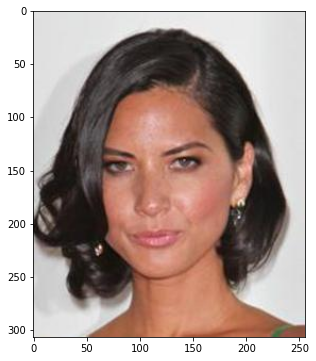

File path = ../resource/asnlib/publicdata/celeb_mini/n00001916/n00001916_00000218.JPEG
Celeb Name: Olivia Munn


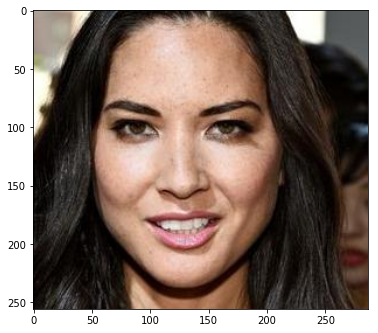

File path = ../resource/asnlib/publicdata/celeb_mini/n00001916/n00001916_00000887.JPEG
Celeb Name: Olivia Munn


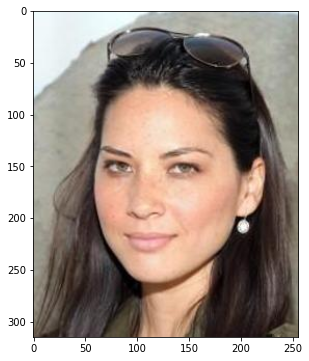

File path = ../resource/asnlib/publicdata/celeb_mini/n00001916/n00001916_00000500.JPEG
Celeb Name: Olivia Munn


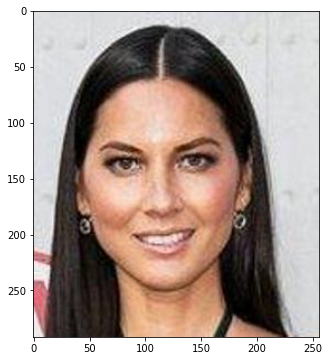

File path = ../resource/asnlib/publicdata/celeb_mini/n00001916/n00001916_00000557.JPEG
Celeb Name: Olivia Munn


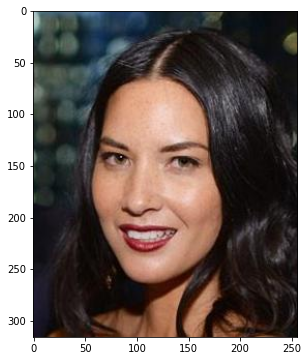

File path = ../resource/asnlib/publicdata/celeb_mini/n00001916/n00001916_00000644.JPEG
Celeb Name: Olivia Munn


In [6]:
# Each subfolder has images of a particular celeb
subfolders = os.listdir(faceDatasetFolder)

# Let us choose a random folder and display all images
random_folder = random.choice(subfolders)

# Also find out the name of the celeb from the folder name and folder-> name mapping dictionary loaded earlier
celebname = labelMap[random_folder]

# Load all images in the subfolder
imagefiles = os.listdir(os.path.join(faceDatasetFolder, random_folder))

# Read each image and display along with the filename and celeb name
for file in imagefiles:
#     Get full path of each image file
    fullPath = os.path.join(faceDatasetFolder,random_folder,file)
    im = cv2.imread(fullPath)
    plt.imshow(im[:,:,::-1])
    plt.show()
#     Also print the filename and celeb name
    print("File path = {}".format(fullPath))
    print("Celeb Name: {}".format(celebname))

## <font color="blue">TODO</font>
You have to write the code for enrollment and testing to get the desired output as shown in the intro section.

**You can take help from the code we had provided in week 4 material.**

## <font color="red">1. Enrollment of Celeb Images </font>
Process images one by and one. 

Convert image from RGB to BGR, because Dlib uses RGB as default format.

Detect faces in the image and compute a face descriptor for each image and save them in an array so that it can be used during testing.

# Writeup: 
https://github.com/Max7384/Project2DoppelGangerFindCelebretyLookAlike/blob/main/Project2_DoppelGanger_Find-Celebrity-Look-Alike.txt

### 1.1 
Gather subfolders of cleb_mini and import pickle

In [27]:
import _pickle as cPickle

subfolders = []
for x in os.listdir(faceDatasetFolder):
    xpath = os.path.join(faceDatasetFolder, x)
    if os.path.isdir(xpath):
        subfolders.append(xpath)

### 1.2 
create a dictonary, if it is JPEG store the absolute file name in image Paths and with the same index as the file name

In [28]:
nameLabelMap = {}
labels = []
imagePaths = []
for i, subfolder in enumerate(subfolders):
    for x in os.listdir(subfolder):
        #print(x)
        xpath = os.path.join(subfolder, x)
        #print(xpath)
        if x.endswith('JPEG'):
            imagePaths.append(xpath)
            labels.append(i)
            nameLabelMap[xpath] = subfolder.split('/')[-1]

### 1.3
Iterate over the jpegs, detect the faces in each one, calculate the face descriptors, transform Dlib's format to NumPy, stack the face desciptors for each face in imags as rows, save the label for the image together with the file name, due to the structure of the file name we dont need to save the prefix of the file name seperately.

I was trying out to use a grayscale image for the variables faces, shape and faceDescriptor. There is some time saving but nevertheless I was not able to use a grayscale image for faceDescriptor. 


In [32]:
index = {}
i = 0
faceDescriptors = None

for imagePath in imagePaths:
    print(f'processing: {imagePath}')
    img = cv2.imread(imagePath)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    faces = faceDetector(img_RGB)
    print(f'{len(faces)} Face(s) found')
    for k, face in enumerate(faces):
        shape = shapePredictor(img_RGB, face)
        faceDescriptor = faceRecognizer.compute_face_descriptor(img_RGB, shape)
        
        faceDescriptorList = [x for x in faceDescriptor]
        faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
        faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]
        
         # Stack face descriptors (1x128) for each face in images, as rows
        if faceDescriptors is None:
            faceDescriptors = faceDescriptorNdarray
        else:
            faceDescriptors = np.concatenate((faceDescriptors, faceDescriptorNdarray), axis=0)

        # save the label for this face in index. We will use it later to identify
        # person name corresponding to face descriptors stored in NumPy Array
        # due to the structure of the data there is no need to save the prefix of the file name
        index[i] = (nameLabelMap[imagePath], str(imagePath).split('/')[-1].split('_')[-1])
        i += 1

processing: ../resource/asnlib/publicdata/celeb_mini/n00001267/n00001267_00000198.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001267/n00001267_00000045.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001267/n00001267_00000643.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001267/n00001267_00000205.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001267/n00001267_00000638.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000111/n00000111_00000033.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000111/n00000111_00000770.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000111/n00000111_00000459.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000111/n00000111_00000602.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000111/n00000111_

1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001219/n00001219_00000192.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001219/n00001219_00000540.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001219/n00001219_00000388.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001219/n00001219_00000002.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001799/n00001799_00000850.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001799/n00001799_00000145.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001799/n00001799_00000606.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001799/n00001799_00000190.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001799/n00001799_00000391.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n000

processing: ../resource/asnlib/publicdata/celeb_mini/n00002270/n00002270_00000178.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002270/n00002270_00000883.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002507/n00002507_00000524.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002507/n00002507_00000226.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002507/n00002507_00000495.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002507/n00002507_00000724.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002507/n00002507_00000949.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000235/n00000235_00000948.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000235/n00000235_00000380.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000235/n00000235_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001809/n00001809_00000719.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001809/n00001809_00000152.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001809/n00001809_00000471.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001809/n00001809_00000298.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000533/n00000533_00000208.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000533/n00000533_00000286.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000533/n00000533_00000117.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000533/n00000533_00000269.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000533/n00000533_00000199.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001377/n00001377_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000641/n00000641_00000428.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000641/n00000641_00000110.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000641/n00000641_00000594.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001103/n00001103_00000974.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001103/n00001103_00000519.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001103/n00001103_00000387.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001103/n00001103_00000493.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001103/n00001103_00000555.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000611/n00000611_00000858.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000611/n00000611_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001646/n00001646_00000546.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001320/n00001320_00000710.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001320/n00001320_00000531.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001320/n00001320_00000459.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001320/n00001320_00000012.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001320/n00001320_00000161.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002472/n00002472_00000419.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002472/n00002472_00000690.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002472/n00002472_00000633.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002472/n00002472_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000640/n00000640_00000671.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000640/n00000640_00000667.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000640/n00000640_00000407.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000640/n00000640_00000610.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002370/n00002370_00000543.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002370/n00002370_00000903.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002370/n00002370_00000488.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002370/n00002370_00000555.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002370/n00002370_00000563.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001107/n00001107_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001270/n00001270_00000100.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001270/n00001270_00000004.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001270/n00001270_00000478.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000228/n00000228_00000575.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000228/n00000228_00000260.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000228/n00000228_00000850.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000228/n00000228_00000344.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000228/n00000228_00000657.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001589/n00001589_00000795.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001589/n00001589_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000257/n00000257_00000434.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000257/n00000257_00000052.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000967/n00000967_00000440.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000967/n00000967_00000031.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000967/n00000967_00000882.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000967/n00000967_00000179.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000967/n00000967_00000529.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000163/n00000163_00000876.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000163/n00000163_00000616.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000163/n00000163_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000974/n00000974_00000533.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000974/n00000974_00000840.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001115/n00001115_00000367.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001115/n00001115_00000717.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001115/n00001115_00000469.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001115/n00001115_00000890.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001115/n00001115_00000146.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002568/n00002568_00000214.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002568/n00002568_00000408.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002568/n00002568_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002023/n00002023_00000649.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002023/n00002023_00000393.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002023/n00002023_00000605.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002023/n00002023_00000151.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002023/n00002023_00000038.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000690/n00000690_00000319.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000690/n00000690_00000026.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000690/n00000690_00000587.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000690/n00000690_00000616.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000690/n00000690_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002418/n00002418_00000497.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002418/n00002418_00000418.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002418/n00002418_00000970.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002418/n00002418_00000770.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001597/n00001597_00000547.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001597/n00001597_00000422.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001597/n00001597_00000443.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001597/n00001597_00000971.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001597/n00001597_00000770.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001645/n00001645_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000805/n00000805_00000425.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000805/n00000805_00000487.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000805/n00000805_00000366.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000805/n00000805_00000054.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002033/n00002033_00000977.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002033/n00002033_00000384.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002033/n00002033_00000672.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002033/n00002033_00000490.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002033/n00002033_00000998.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000921/n00000921_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001364/n00001364_00000385.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001364/n00001364_00000761.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001364/n00001364_00000062.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001364/n00001364_00000015.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000809/n00000809_00000791.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000809/n00000809_00000753.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000809/n00000809_00000636.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000809/n00000809_00000483.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000809/n00000809_00000158.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000124/n00000124_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001280/n00001280_00000771.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001280/n00001280_00000264.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001280/n00001280_00000090.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000777/n00000777_00000692.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000777/n00000777_00000309.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000777/n00000777_00000535.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000777/n00000777_00000056.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000777/n00000777_00000152.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001449/n00001449_00000192.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001449/n00001449_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000136/n00000136_00000166.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001092/n00001092_00000654.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001092/n00001092_00000336.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001092/n00001092_00000177.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001092/n00001092_00000623.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001092/n00001092_00000212.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001340/n00001340_00000566.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001340/n00001340_00000252.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001340/n00001340_00000243.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001340/n00001340_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002266/n00002266_00000160.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002266/n00002266_00000377.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002266/n00002266_00000357.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002266/n00002266_00000290.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002266/n00002266_00000480.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000268/n00000268_00000882.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000268/n00000268_00000460.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000268/n00000268_00000569.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000268/n00000268_00000860.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000268/n00000268_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001206/n00001206_00000031.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001206/n00001206_00000397.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001206/n00001206_00000973.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001276/n00001276_00000528.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001276/n00001276_00000952.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001276/n00001276_00000343.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001276/n00001276_00000636.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001276/n00001276_00000968.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002354/n00002354_00000483.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002354/n00002354_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002605/n00002605_00000411.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002605/n00002605_00000406.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002605/n00002605_00000240.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002185/n00002185_00000001.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002185/n00002185_00000152.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002185/n00002185_00000406.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002185/n00002185_00000282.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002185/n00002185_00000866.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000413/n00000413_00000268.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000413/n00000413_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000078/n00000078_00000414.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000078/n00000078_00000793.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001857/n00001857_00000345.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001857/n00001857_00000715.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001857/n00001857_00000538.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001857/n00001857_00000164.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001857/n00001857_00000349.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000741/n00000741_00000032.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000741/n00000741_00000435.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000741/n00000741_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000221/n00000221_00000102.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000221/n00000221_00000030.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000221/n00000221_00000084.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000221/n00000221_00000381.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000221/n00000221_00000712.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000146/n00000146_00000577.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000146/n00000146_00000605.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000146/n00000146_00000310.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000146/n00000146_00000783.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000146/n00000146_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001955/n00001955_00000602.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001955/n00001955_00000264.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001955/n00001955_00000004.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000201/n00000201_00000294.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000201/n00000201_00000324.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000201/n00000201_00000145.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000201/n00000201_00000021.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000201/n00000201_00000670.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000018/n00000018_00000317.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000018/n00000018_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002431/n00002431_00000209.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000278/n00000278_00000641.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000278/n00000278_00000729.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000278/n00000278_00000744.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000278/n00000278_00000987.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000278/n00000278_00000817.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000501/n00000501_00000108.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000501/n00000501_00000094.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000501/n00000501_00000313.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000501/n00000501_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002180/n00002180_00000279.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002180/n00002180_00000081.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002180/n00002180_00000445.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002180/n00002180_00000994.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001698/n00001698_00000815.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001698/n00001698_00000272.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001698/n00001698_00000157.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001698/n00001698_00000032.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001698/n00001698_00000321.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000322/n00000322_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001308/n00001308_00000591.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001308/n00001308_00000211.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001133/n00001133_00000179.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001133/n00001133_00000677.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001133/n00001133_00000790.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001133/n00001133_00000600.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001133/n00001133_00000440.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001690/n00001690_00000095.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001690/n00001690_00000168.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001690/n00001690_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000096/n00000096_00000393.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000096/n00000096_00000279.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000259/n00000259_00000653.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000259/n00000259_00000500.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000259/n00000259_00000868.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000259/n00000259_00000468.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000259/n00000259_00000234.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000126/n00000126_00000192.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000126/n00000126_00000560.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000126/n00000126_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000772/n00000772_00000296.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000772/n00000772_00000188.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000772/n00000772_00000486.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000772/n00000772_00000234.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000772/n00000772_00000737.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001439/n00001439_00000404.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001439/n00001439_00000501.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001439/n00001439_00000193.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001439/n00001439_00000111.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001439/n00001439_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001758/n00001758_00000228.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001758/n00001758_00000265.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001758/n00001758_00000009.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001758/n00001758_00000931.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001758/n00001758_00000361.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000223/n00000223_00000395.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000223/n00000223_00000161.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000223/n00000223_00000198.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000223/n00000223_00000771.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000223/n00000223_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001685/n00001685_00000900.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001685/n00001685_00000756.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001685/n00001685_00000686.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000538/n00000538_00000190.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000538/n00000538_00000626.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000538/n00000538_00000610.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000538/n00000538_00000061.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000538/n00000538_00000935.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001917/n00001917_00000723.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001917/n00001917_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002333/n00002333_00000773.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002333/n00002333_00000568.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002159/n00002159_00000097.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002159/n00002159_00000075.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002159/n00002159_00000653.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002159/n00002159_00000278.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002159/n00002159_00000624.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001361/n00001361_00000037.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001361/n00001361_00000830.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001361/n00001361_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000840/n00000840_00000355.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000840/n00000840_00000512.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001579/n00001579_00000019.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001579/n00001579_00000448.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001579/n00001579_00000452.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001579/n00001579_00000022.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001579/n00001579_00000306.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000457/n00000457_00000409.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000457/n00000457_00000188.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000457/n00000457_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002557/n00002557_00000688.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002557/n00002557_00000216.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002557/n00002557_00000447.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002557/n00002557_00000426.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002557/n00002557_00000543.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001738/n00001738_00000395.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001738/n00001738_00000073.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001738/n00001738_00000602.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001738/n00001738_00000511.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001738/n00001738_

1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002094/n00002094_00000265.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002094/n00002094_00000570.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002094/n00002094_00000731.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002094/n00002094_00000507.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001227/n00001227_00000327.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001227/n00001227_00000409.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001227/n00001227_00000869.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001227/n00001227_00000487.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001227/n00001227_00000388.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n000

processing: ../resource/asnlib/publicdata/celeb_mini/n00000825/n00000825_00000265.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000825/n00000825_00000455.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000977/n00000977_00000103.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000977/n00000977_00000532.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000977/n00000977_00000180.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000977/n00000977_00000924.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000977/n00000977_00000379.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000222/n00000222_00000987.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000222/n00000222_00000860.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000222/n00000222_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000205/n00000205_00000580.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000092/n00000092_00000146.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000092/n00000092_00000536.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000092/n00000092_00000326.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000092/n00000092_00000042.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000092/n00000092_00000074.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001926/n00001926_00000228.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001926/n00001926_00000875.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001926/n00001926_00000316.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001926/n00001926_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000893/n00000893_00000574.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000729/n00000729_00000738.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000729/n00000729_00000082.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000729/n00000729_00000313.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000729/n00000729_00000057.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000729/n00000729_00000016.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000984/n00000984_00000476.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000984/n00000984_00000525.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000984/n00000984_00000753.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000984/n00000984_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001160/n00001160_00000407.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001160/n00001160_00000714.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001160/n00001160_00000411.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001160/n00001160_00000915.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001160/n00001160_00000186.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000541/n00000541_00000092.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000541/n00000541_00000266.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000541/n00000541_00000568.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000541/n00000541_00000155.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000541/n00000541_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002018/n00002018_00000186.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002018/n00002018_00000722.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002018/n00002018_00000164.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000226/n00000226_00000379.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000226/n00000226_00000066.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000226/n00000226_00000800.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000226/n00000226_00000876.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000226/n00000226_00000292.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001062/n00001062_00000639.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001062/n00001062_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000132/n00000132_00000222.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002261/n00002261_00000638.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002261/n00002261_00000771.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002261/n00002261_00000966.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002261/n00002261_00000531.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002261/n00002261_00000622.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001757/n00001757_00000974.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001757/n00001757_00000597.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001757/n00001757_00000129.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001757/n00001757_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002587/n00002587_00000123.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002587/n00002587_00000122.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002587/n00002587_00000381.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002587/n00002587_00000913.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002587/n00002587_00000704.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001013/n00001013_00000197.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001013/n00001013_00000765.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001013/n00001013_00000293.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001013/n00001013_00000289.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001013/n00001013_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002364/n00002364_00000112.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002364/n00002364_00000515.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002364/n00002364_00000775.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002364/n00002364_00000082.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002364/n00002364_00000651.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000934/n00000934_00000113.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000934/n00000934_00000237.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000934/n00000934_00000671.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000934/n00000934_00000918.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000934/n00000934_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002305/n00002305_00000829.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002305/n00002305_00000472.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002305/n00002305_00000243.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002305/n00002305_00000516.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002305/n00002305_00000629.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000050/n00000050_00000050.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000050/n00000050_00000904.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000050/n00000050_00000498.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000050/n00000050_00000115.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000050/n00000050_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000391/n00000391_00000123.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000391/n00000391_00000440.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000391/n00000391_00000498.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000391/n00000391_00000162.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000391/n00000391_00000174.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000320/n00000320_00000491.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000320/n00000320_00000604.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000320/n00000320_00000151.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000320/n00000320_00000350.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000320/n00000320_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001376/n00001376_00000575.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001376/n00001376_00000938.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001376/n00001376_00000471.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001376/n00001376_00000373.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000097/n00000097_00000466.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000097/n00000097_00000997.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000097/n00000097_00000651.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000097/n00000097_00000450.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000097/n00000097_00000779.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002086/n00002086_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000346/n00000346_00000646.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000346/n00000346_00000778.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000346/n00000346_00000514.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000346/n00000346_00000559.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000875/n00000875_00000782.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000875/n00000875_00000022.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000875/n00000875_00000254.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000875/n00000875_00000736.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000875/n00000875_00000448.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001046/n00001046_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001288/n00001288_00000702.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001288/n00001288_00000955.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001288/n00001288_00000164.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001866/n00001866_00000233.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001866/n00001866_00000655.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001866/n00001866_00000531.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001866/n00001866_00000141.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001866/n00001866_00000623.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000471/n00000471_00000226.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000471/n00000471_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000393/n00000393_00000376.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000393/n00000393_00000819.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000602/n00000602_00000771.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000602/n00000602_00000511.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000602/n00000602_00000399.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000602/n00000602_00000244.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000602/n00000602_00000317.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001825/n00001825_00000243.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001825/n00001825_00000310.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001825/n00001825_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001515/n00001515_00000093.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001515/n00001515_00000498.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000852/n00000852_00000531.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000852/n00000852_00000458.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000852/n00000852_00000570.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000852/n00000852_00000507.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000852/n00000852_00000788.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002444/n00002444_00000378.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002444/n00002444_00000694.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002444/n00002444_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001764/n00001764_00000925.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001764/n00001764_00000163.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001764/n00001764_00000544.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001764/n00001764_00000437.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001764/n00001764_00000358.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001879/n00001879_00000276.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001879/n00001879_00000611.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001879/n00001879_00000719.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001879/n00001879_00000056.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001879/n00001879_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000108/n00000108_00000350.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000108/n00000108_00000452.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000108/n00000108_00000805.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000335/n00000335_00000076.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000335/n00000335_00000108.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000335/n00000335_00000489.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000335/n00000335_00000169.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000335/n00000335_00000466.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001347/n00001347_00000116.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001347/n00001347_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000930/n00000930_00000831.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000930/n00000930_00000780.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000464/n00000464_00000224.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000464/n00000464_00000588.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000464/n00000464_00000121.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000464/n00000464_00000072.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000464/n00000464_00000137.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000130/n00000130_00000723.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000130/n00000130_00000373.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000130/n00000130_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001434/n00001434_00000438.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001434/n00001434_00000340.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001434/n00001434_00000208.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001434/n00001434_00000069.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001434/n00001434_00000361.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001937/n00001937_00000513.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001937/n00001937_00000246.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001937/n00001937_00000899.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001937/n00001937_00000343.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001937/n00001937_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002579/n00002579_00000502.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002579/n00002579_00000406.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002579/n00002579_00000353.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002579/n00002579_00000349.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002413/n00002413_00000391.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002413/n00002413_00000309.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002413/n00002413_00000128.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002413/n00002413_00000493.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002413/n00002413_00000125.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002012/n00002012_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001064/n00001064_00000007.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001064/n00001064_00000494.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001604/n00001604_00000991.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001604/n00001604_00000715.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001604/n00001604_00000282.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001604/n00001604_00000484.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001604/n00001604_00000670.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000176/n00000176_00000567.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000176/n00000176_00000394.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000176/n00000176_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002359/n00002359_00000688.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000749/n00000749_00000451.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000749/n00000749_00000368.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000749/n00000749_00000797.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000749/n00000749_00000083.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000749/n00000749_00000492.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000210/n00000210_00000613.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000210/n00000210_00000737.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000210/n00000210_00000798.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000210/n00000210_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000646/n00000646_00000063.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002228/n00002228_00000435.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002228/n00002228_00000013.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002228/n00002228_00000439.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002228/n00002228_00000474.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002228/n00002228_00000182.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001797/n00001797_00000912.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001797/n00001797_00000103.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001797/n00001797_00000725.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001797/n00001797_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000368/n00000368_00000918.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002451/n00002451_00000073.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002451/n00002451_00000252.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002451/n00002451_00000248.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002451/n00002451_00000507.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002451/n00002451_00000614.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001662/n00001662_00000074.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001662/n00001662_00000388.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001662/n00001662_00000886.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001662/n00001662_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001723/n00001723_00000810.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001723/n00001723_00000017.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001723/n00001723_00000502.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001723/n00001723_00000543.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001843/n00001843_00000352.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001843/n00001843_00000060.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001843/n00001843_00000488.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001843/n00001843_00000407.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001843/n00001843_00000165.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001213/n00001213_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001649/n00001649_00000627.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001649/n00001649_00000939.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001915/n00001915_00000370.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001915/n00001915_00000687.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001915/n00001915_00000921.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001915/n00001915_00000055.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001915/n00001915_00000868.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002240/n00002240_00000539.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002240/n00002240_00000348.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002240/n00002240_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000794/n00000794_00000406.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001265/n00001265_00000553.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001265/n00001265_00000636.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001265/n00001265_00000010.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001265/n00001265_00000616.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001265/n00001265_00000142.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001105/n00001105_00000669.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001105/n00001105_00000413.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001105/n00001105_00000736.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001105/n00001105_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000510/n00000510_00000536.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002274/n00002274_00000322.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002274/n00002274_00000620.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002274/n00002274_00000533.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002274/n00002274_00000712.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002274/n00002274_00000046.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002047/n00002047_00000582.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002047/n00002047_00000243.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002047/n00002047_00000218.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002047/n00002047_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001292/n00001292_00000565.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001292/n00001292_00000460.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001292/n00001292_00000178.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001292/n00001292_00000933.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001292/n00001292_00000318.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000285/n00000285_00000963.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000285/n00000285_00000554.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000285/n00000285_00000650.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000285/n00000285_00000575.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000285/n00000285_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001622/n00001622_00000652.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001622/n00001622_00000202.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001622/n00001622_00000224.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001622/n00001622_00000463.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000194/n00000194_00000600.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000194/n00000194_00000925.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000194/n00000194_00000495.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000194/n00000194_00000375.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000194/n00000194_00000118.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000548/n00000548_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000131/n00000131_00000424.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000131/n00000131_00000809.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000125/n00000125_00000409.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000125/n00000125_00000054.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000125/n00000125_00000632.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000125/n00000125_00000222.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000125/n00000125_00000783.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000199/n00000199_00000056.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000199/n00000199_00000187.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000199/n00000199_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002189/n00002189_00000984.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002189/n00002189_00000707.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002189/n00002189_00000064.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002189/n00002189_00000398.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002189/n00002189_00000818.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001411/n00001411_00000298.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001411/n00001411_00000332.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001411/n00001411_00000057.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001411/n00001411_00000503.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001411/n00001411_

processing: ../resource/asnlib/publicdata/celeb_mini/n00002055/n00002055_00000240.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002055/n00002055_00000132.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002055/n00002055_00000309.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002079/n00002079_00000983.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002079/n00002079_00000350.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002079/n00002079_00000242.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002079/n00002079_00000556.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002079/n00002079_00000645.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000622/n00000622_00000890.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000622/n00000622_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001974/n00001974_00000124.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001974/n00001974_00000237.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001974/n00001974_00000186.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002302/n00002302_00000243.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002302/n00002302_00000166.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002302/n00002302_00000625.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002302/n00002302_00000019.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002302/n00002302_00000351.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002145/n00002145_00000315.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00002145/n00002145_

processing: ../resource/asnlib/publicdata/celeb_mini/n00000504/n00000504_00000582.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000849/n00000849_00000831.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000849/n00000849_00000113.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000849/n00000849_00000095.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000849/n00000849_00000892.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000849/n00000849_00000575.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001461/n00001461_00000260.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001461/n00001461_00000734.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001461/n00001461_00000313.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001461/n00001461_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001186/n00001186_00000079.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000099/n00000099_00000457.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000099/n00000099_00000343.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000099/n00000099_00000573.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000099/n00000099_00000791.JPEG
0 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000099/n00000099_00000119.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000572/n00000572_00000489.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000572/n00000572_00000580.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000572/n00000572_00000036.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000572/n00000572_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001541/n00001541_00000391.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001541/n00001541_00000411.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001541/n00001541_00000503.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001541/n00001541_00000313.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000816/n00000816_00000653.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000816/n00000816_00000075.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000816/n00000816_00000448.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000816/n00000816_00000043.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000816/n00000816_00000080.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001196/n00001196_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001672/n00001672_00000628.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001672/n00001672_00000486.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001672/n00001672_00000813.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001672/n00001672_00000034.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001672/n00001672_00000864.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001678/n00001678_00000048.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001678/n00001678_00000710.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001678/n00001678_00000679.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001678/n00001678_00000585.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001678/n00001678_

processing: ../resource/asnlib/publicdata/celeb_mini/n00001296/n00001296_00000007.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001296/n00001296_00000292.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001296/n00001296_00000705.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001296/n00001296_00000288.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00001296/n00001296_00000162.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000519/n00000519_00000086.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000519/n00000519_00000069.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000519/n00000519_00000793.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000519/n00000519_00000360.JPEG
1 Face(s) found
processing: ../resource/asnlib/publicdata/celeb_mini/n00000519/n00000519_

### 1.4
Save the descriptors and binarize the index

In [33]:
np.save('descriptors.npy', faceDescriptors)
# index has image paths in same order as descriptors in faceDescriptors
with open('index.pkl', 'wb') as f:
    cPickle.dump(index, f)

## <font color="red">2. Testing</font>
Once you have enrolled the celebs, you should be able to use them to find the closest celeb to the given test image using minimum distance rule.

You need to find the embeddings of the test images and compare it with the enrolled celebs to find the look-alike. 

Finally, display the celeb along side the input image. Partial code is given.

# Writeup: 
https://github.com/Max7384/Project2DoppelGangerFindCelebretyLookAlike/blob/main/Project2_DoppelGanger_Find-Celebrity-Look-Alike.txt

In [35]:
matplotlib.rcParams['figure.figsize'] = (12.0,12.0)

### 2.1 
Define THRESHOLD and load index.pkl and already enrolled descriptors

In [36]:
THRESHOLD = 0.6

index = np.load('index.pkl', allow_pickle=True)
faceDescriptorsEnrolled = np.load('descriptors.npy')

### 2.2
Walk the test images directory, read file by file, change the colorspace from BGR to RGB, identify the faces
in the picture, iterate through all the faces found, calculate the face descriptors, convert them from Dlib format
to NumPy format.

I was trying out to use a grayscale image for the variables faces, shape and faceDescriptor. There is some time saving but nevertheless I was not able to use a grayscale image for faceDescriptor. Therefore 

### 2.3
calculate distances to all enrolled faces, look for the minimum distance, use the index number to get the
code name and the and the img file name. Concernate the both variables to get the complete file name
### 2.4
Check if the mindistance is below the Threshold, use code_name as key in order to get the Name of the celebrity
get the exact file 
### 2.5
Comment out the black img and add imshow of lookalikeimg

index: n00000102


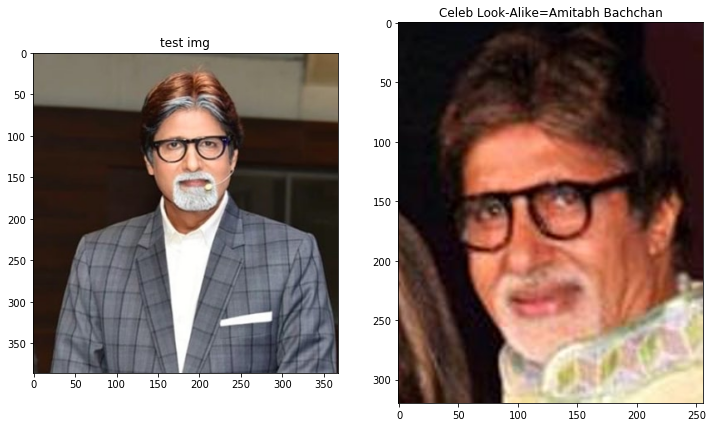

index: n00002238


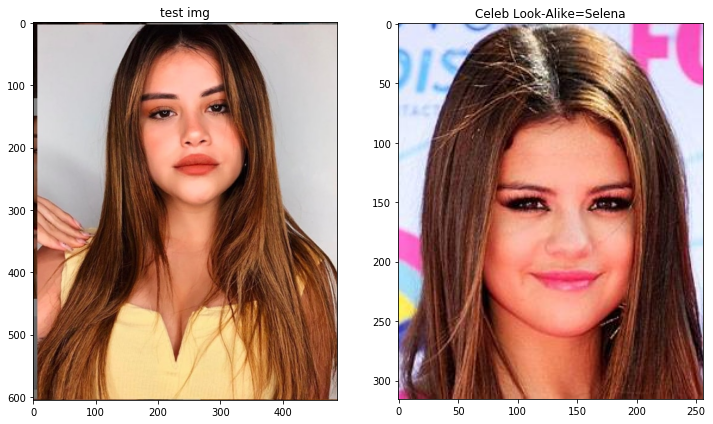

In [38]:
# 2.2
# read image
testImages = glob.glob('../resource/asnlib/publicdata/test-images/*.jpg')

for test in testImages:
    im = cv2.imread(test)
    imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    #####################
    #  YOUR CODE HERE

    faces = faceDetector(imDlib)
    
    for face in faces:
        shape = shapePredictor(imDlib, face)
        
        # Compute face descriptor using neural network defined in Dlib
        # using facial landmark shape
        faceDescriptor = faceRecognizer.compute_face_descriptor(imDlib, shape)

        # Convert face descriptor from Dlib's format to list, then a NumPy array
        faceDescriptorList = [m for m in faceDescriptor]
        faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
        faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]
        
        # 2.3 # Calculate Euclidean distances between face descriptor calculated on face dectected
        # in current frame with all the face descriptors we calculated while enrolling faces
        distances = np.linalg.norm(faceDescriptorsEnrolled - faceDescriptorNdarray, axis=1)
        
        # Calculate minimum distance and index of this face
        argmin = np.argmin(distances)  # index
        minDistance = distances[argmin]  # minimum distance
        
        # extract code + pic name from saved index.pkl
        code_name = str(index[argmin][0])
        pic_name = str(index[argmin][0]) + '_' + str(index[argmin][1])      
        
        # 2.4
        if minDistance <= THRESHOLD:
            label = labelMap[code_name]
            print(f'index: {code_name}')
            img = cv2.imread(os.path.join(faceDatasetFolder, code_name, pic_name))
            lookalikeimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            label = 'unknown'         
    
    
    celeb_name = label
    ####################
    
    plt.subplot(121)
    plt.imshow(imDlib)
    plt.title("test img")
    
    #TODO - display celeb image which looks like the test image instead of the black image. 
    plt.subplot(122)
    #plt.imshow(np.zeros((200,200,3)))
    # 2.5
    plt.imshow(lookalikeimg)
    plt.title("Celeb Look-Alike={}".format(celeb_name))
    plt.show()